In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1) Delivery_time -> Predict delivery time using sorting time
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [9]:
data1 = pd.read_csv("delivery_time.csv")
data1.head()


,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
data1.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
data1[["DeliveryTime","SortingTime"]].corr()
# Here DeliveryTime and SortingTime are 82.5% correlated

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


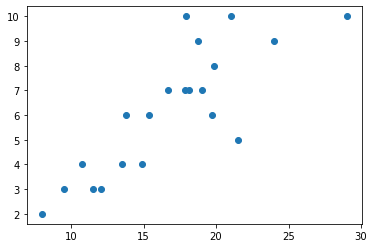

In [14]:
plt.scatter(data1["DeliveryTime"],data1["SortingTime"])

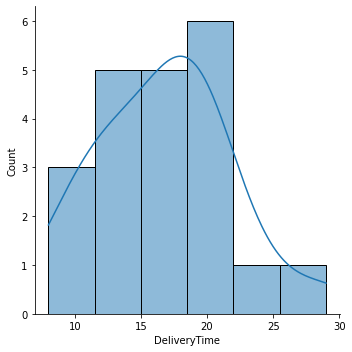

In [15]:
sns.displot(data1["DeliveryTime"], kde=True)

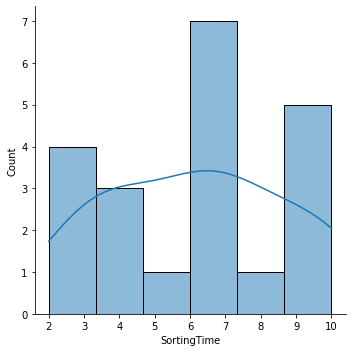

In [16]:
sns.displot(data1["SortingTime"], kde=True)

In [ ]:
#Fitting Regression Model

In [19]:
import statsmodels.formula.api as smf 
model=smf.ols("DeliveryTime~SortingTime",data=data1).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        15:43:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [22]:
print(model.tvalues,"\n",model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

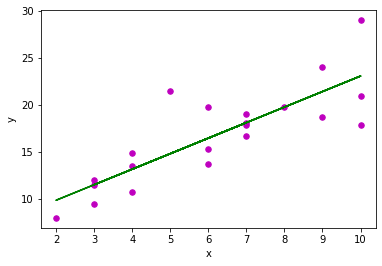

In [24]:
x = data1["SortingTime"].values
y = data1["DeliveryTime"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 6.5827
b1 =1.6490
# predicted response vector
y_hat = b0 + b1*x
 
# plotting the regression line
plt.plot(x, y_hat, color = "g")
  
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

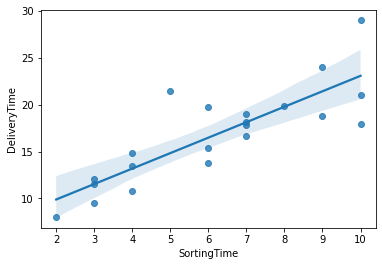

In [25]:
sns.regplot(x=data1['SortingTime'],y=data1['DeliveryTime'])

In [26]:
#Predict for new data point
pred=model.predict(data1["SortingTime"])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [27]:
data1["Y_hat"]=pred
data1
#Y_hat values are predicted values

,DeliveryTime,SortingTime,Y_hat
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [56]:
# Manual prediction of Devliery time when sorting time is 10 
Deliverytime = (6.5827) + (1.6490)*(10)
Deliverytime


23.0727

In [28]:
import numpy as np

In [29]:
mse=np.mean((data1["DeliveryTime"]-data1["Y_hat"])**2)

In [30]:
mse

7.793311548584063

In [31]:
rmse=np.sqrt(mse)
rmse

2.7916503270617654

# Salary_hike -> Build a prediction model for Salary_hike

#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [32]:
data2 = pd.read_csv("Salary_Data.csv")
data2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [34]:
data2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [35]:
data2[["YearsExperience","Salary"]].corr()

# Very Highly Co-related data as correlation cofficient is 0.97

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


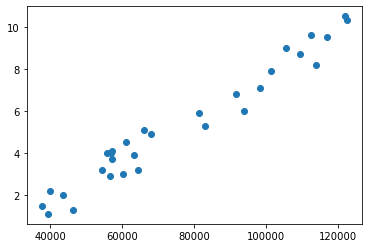

In [36]:
plt.scatter(data2["Salary"],data2["YearsExperience"])

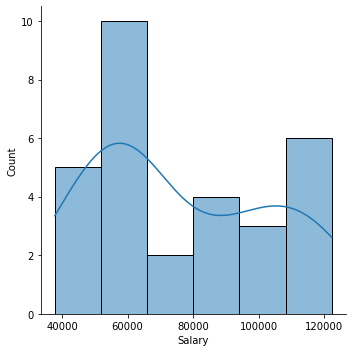

In [37]:
sns.displot(data2["Salary"],kde=True)

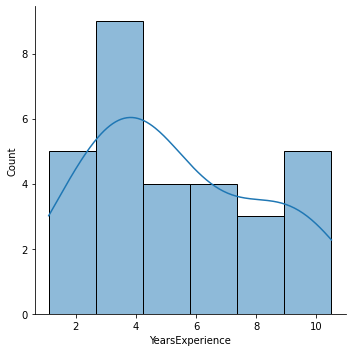

In [38]:
sns.displot(data2["YearsExperience"],kde=True)

In [49]:
#Fitting Regression Model
import statsmodels.formula.api as smf
model2=smf.ols("Salary~YearsExperience",data=data2).fit()

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        15:57:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

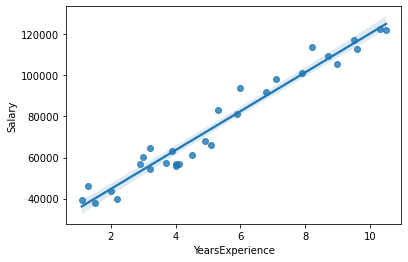

In [51]:
sns.regplot(x=data2["YearsExperience"],y=data2["Salary"])

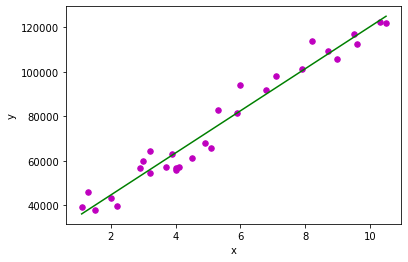

In [52]:
x = data2["YearsExperience"].values
y = data2["Salary"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 25792.200
b1 =9449.96
# predicted response vector
y_hat = b0 + b1*x
 
# plotting the regression line
plt.plot(x, y_hat, color = "g")
  
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [45]:
pred1=model2.predict(data2["YearsExperience"])
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [46]:
data2["Y_hat"]=pred1
data2
#Y_hat values are predicted salary values

,YearsExperience,Salary,Y_hat
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [55]:
# Manual prediction of salary for 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162